In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

churnData = pd.read_csv('customer_churn.csv')
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [2]:
# Cast TotalChargs column to numeric and encode Churn
churnData.replace({'TotalCharges': {' ':''}}, inplace=True)
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges']).astype(float)
#churnData.isnull().sum()
churnData['TotalCharges'].fillna(churnData['TotalCharges'].dropna().median(), inplace=True)
churnData.replace({'Churn':{'Yes':1, 'No':0}}, inplace=True)
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   int64  
dtypes: float64(2), int64(3), object(11)
memory

In [3]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(np.array(X_train))
X_train_scaled = scaler.transform(np.array(X_train))
X_test_scaled = scaler.transform(np.array(X_test))

In [10]:
# Fit a KNN Classifier model on the training data

def knn_classifier_range(a, b):
    start = min(a,b)
    for i in range(abs(b-a)):
        
        model = KNeighborsClassifier(n_neighbors=start+i, weights='uniform')
        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_test_scaled)
        y_pred_train = model.predict(X_train_scaled) # predict train (for sanity checks)

        performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                       'Train': [accuracy_score(y_train, y_pred_train),
                                                 precision_score(y_train, y_pred_train),
                                                 recall_score(y_train, y_pred_train)],
                                       'Test': [accuracy_score(y_test, y_pred),
                                                precision_score(y_test, y_pred),
                                                recall_score(y_test, y_pred)]})
        
        print(f"K = {start+i}")
        display(performance_log)

knn_classifier_range(1,8)

K = 1


,Error_metric,Train,Test
0,Accuracy,0.98864,0.740241
1,Precision,0.97861,0.509091
2,Recall,0.97861,0.525469


K = 2


,Error_metric,Train,Test
0,Accuracy,0.858537,0.766501
1,Precision,0.994342,0.620879
2,Recall,0.469920,0.302949


K = 3


,Error_metric,Train,Test
0,Accuracy,0.861555,0.758694
1,Precision,0.776235,0.549254
2,Recall,0.672460,0.493298


K = 4


,Error_metric,Train,Test
0,Accuracy,0.835108,0.774308
1,Precision,0.827746,0.618026
2,Recall,0.478610,0.386059


K = 5


,Error_metric,Train,Test
0,Accuracy,0.835996,0.774308
1,Precision,0.734811,0.587302
2,Recall,0.598262,0.495979


K = 6


,Error_metric,Train,Test
0,Accuracy,0.829428,0.787793
1,Precision,0.798216,0.659483
2,Recall,0.478610,0.410188


K = 7


,Error_metric,Train,Test
0,Accuracy,0.824459,0.786373
1,Precision,0.720627,0.616883
2,Recall,0.553476,0.509383


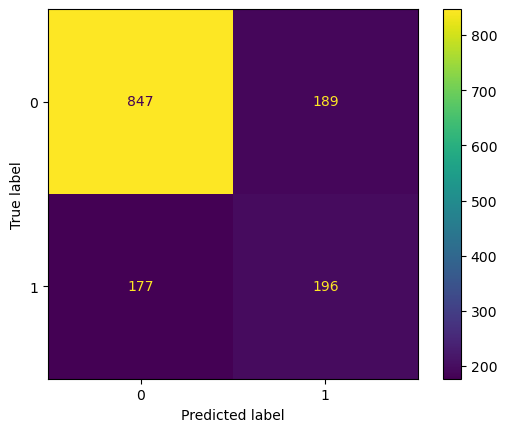

In [11]:
model = KNeighborsClassifier(n_neighbors=1, weights='uniform')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled) # predict train (for sanity checks)

cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
#
#
#
#
#
#
#

In [104]:
# Fit a Logistic Regression model on the training data

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.787895,0.806955
1,Precision,0.646829,0.698039
2,Recall,0.443182,0.477212
